# Project Nutrino

## EDA Analysis

### Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import

In [2]:
# Cool note this 
nutrition = pd.read_parquet('data/recipes.parquet') 
# nutrition.head()

# This setting allows us to see all the columns in a dataframe 
# when there are lots of columns present
pd.set_option('display.max_columns', None)
nutrition.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,Frozen Desserts,"[Dessert, Low Protein, Low Cholesterol, Health...","[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,Beverages,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,Soy/Tofu,"[Beans, Vegetable, Low Cholesterol, Weeknight,...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,Vegetable,"[Low Protein, Vegan, Low Cholesterol, Healthy,...","[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [3]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[ns, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [4]:
nutrition.drop(['RecipeId', 'AuthorName', 'AuthorId', 'Images', 'RecipeYield', 'RecipeInstructions','CookTime', 'PrepTime', 'TotalTime'], axis = 1, inplace = True)

In [5]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Name                        522517 non-null  object             
 1   DatePublished               522517 non-null  datetime64[ns, UTC]
 2   Description                 522512 non-null  object             
 3   RecipeCategory              521766 non-null  object             
 4   Keywords                    522517 non-null  object             
 5   RecipeIngredientQuantities  522517 non-null  object             
 6   RecipeIngredientParts       522517 non-null  object             
 7   AggregatedRating            269294 non-null  float64            
 8   ReviewCount                 275028 non-null  float64            
 9   Calories                    522517 non-null  float64            
 10  FatContent                  522517 non-null 

In [6]:
# Lets analyze the null values present in our data
nutrition.isna().sum()

Name                               0
DatePublished                      0
Description                        5
RecipeCategory                   751
Keywords                           0
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
dtype: int64

In [8]:
# Lets eliminate recipes with no RecipeServings values as 
# we want our algorithm to reccomend dishes with accurate (calroies & macros)/ serving
nutrition = nutrition[nutrition.RecipeServings.notnull()]
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339606 entries, 0 to 522514
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Name                        339606 non-null  object             
 1   DatePublished               339606 non-null  datetime64[ns, UTC]
 2   Description                 339602 non-null  object             
 3   RecipeCategory              339122 non-null  object             
 4   Keywords                    339606 non-null  object             
 5   RecipeIngredientQuantities  339606 non-null  object             
 6   RecipeIngredientParts       339606 non-null  object             
 7   AggregatedRating            172370 non-null  float64            
 8   ReviewCount                 175866 non-null  float64            
 9   Calories                    339606 non-null  float64            
 10  FatContent                  339606 non-null 

In [13]:
# We want our data to be tabulated per serving so as to have accurate macro ratios
# So lets clean our data respectively by casting it into new columns
nutrition['Protein/Serving']= nutrition['ProteinContent']/nutrition['RecipeServings']
nutrition['Calories/Serving']= nutrition['Calories']/nutrition['RecipeServings']
nutrition['FatContent/Serving']= nutrition['FatContent']/nutrition['RecipeServings']
nutrition['SaturatedFatContent/Serving']= nutrition['SaturatedFatContent']/nutrition['RecipeServings']
nutrition['CholesterolContent/Serving']= nutrition['CholesterolContent']/nutrition['RecipeServings']
nutrition['SodiumContent/Serving']= nutrition['SodiumContent']/nutrition['RecipeServings']
nutrition['CarbohydrateContent/Serving']= nutrition['CarbohydrateContent']/nutrition['RecipeServings']
nutrition['FiberContent/Serving']= nutrition['FiberContent']/nutrition['RecipeServings']
nutrition['SugarContent/Serving']= nutrition['SugarContent']/nutrition['RecipeServings']
nutrition = nutrition.round(2)
# Using samples we can clearly see a more relevant macros spread
nutrition.head()


,Name,DatePublished,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
0,Low-Fat Berry Blue Frozen Dessert,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"[Dessert, Low Protein, Low Cholesterol, Health...","[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,0.80,42.72,0.62,0.32,2.00,7.45,9.28,0.90,7.55
1,Biryani,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,Chicken Breast,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,10.57,185.12,9.80,2.77,62.13,61.40,14.07,1.50,3.40
2,Best Lemonade,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,Beverages,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,0.08,77.78,0.05,0.00,0.00,0.45,20.38,0.10,19.30
3,Carina's Tofu-Vegetable Kebabs,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,Soy/Tofu,"[Beans, Vegetable, Low Cholesterol, Weeknight,...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,14.65,268.05,12.00,1.90,0.00,779.30,32.10,8.65,16.05
4,Cabbage Soup,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,Vegetable,"[Low Protein, Vegan, Low Cholesterol, Healthy,...","[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,1.08,25.90,0.10,0.02,0.00,239.82,6.28,1.20,4.42


In [ ]:
# Lets now drop the columns that have become redundant


In [ ]:
# Lets visualize when most of these dishes were added to the dataset
sns.histplot(nutrition['DatePublished'], bins=10)

In [20]:
# To ensure that all recipes are up to date 
# lets isolate recipes from the past 20 years 
nutrition = nutrition.loc[nutrition['DatePublished']>= '2003-01-01']

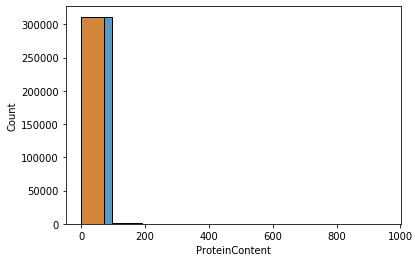

In [27]:
# Lets check for outliers in macro content
sns.histplot(nutrition['ProteinContent'], bins=10)
nutrition = nutrition.loc[nutrition['ProteinContent'] <= 1000]

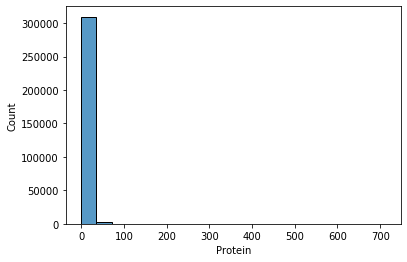

In [29]:
# Lets normalize our macro amounts by dividing them by serving amount to calculate per serving. 
nutrition['Protein']= nutrition['ProteinContent']/nutrition['RecipeServings']
sns.histplot(nutrition['Protein'], bins=20)

In [30]:
nutrition = nutrition.loc[nutrition['Protein'] <= 100]

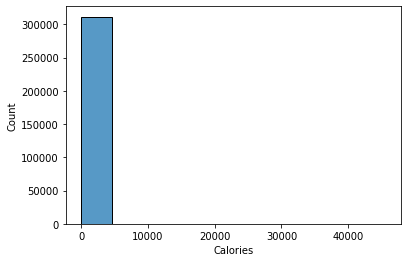

In [33]:
sns.histplot(nutrition['Calories'], bins=10)

In [34]:
nutrition = nutrition.loc[nutrition['Calories'] <= 3000]

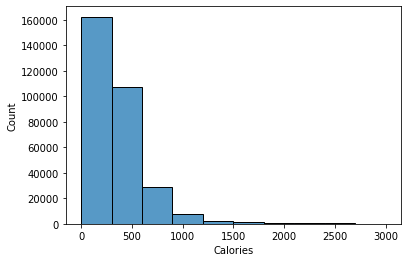

In [35]:
sns.histplot(nutrition['Calories'], bins=10)